In [127]:
class Vektor:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        x, y = self.koordinate()
        return ('{}(x = {}, y = {})'.format(self.__class__.__name__, x, y))
    
    def __add__(self, other):
        x1 = self.x
        x2 = other.x
        y1 = self.y
        y2 = other.y
        return(Vektor(x1 + x2, y1 + y2))
    
    def __sub__(self, other):
        x1 = self.x
        x2 = other.x
        y1 = self.y
        y2 = other.y
        return(Vektor(x1 - x2, y1 - y2))
    
    def __rmul__(self, konstanta):
        x1 = konstanta * self.x
        y1 = konstanta * self.y
        return(Vektor(x1, y1))
    
    def koordinate(self):
        return self.x, self.y
    
class Premica:
    def __init__(self, u1, u2): # u tocka; rabili bomo koordinate
        u1x, u1y = u1.koordinate()
        u2x, u2y = u2.koordinate()
        if u2x - u1x != 0:
            self.koef = (u2y -u1y) / (u2x - u1x)
            self.n = u1y - self.koef * u1x
        else:
            self.koef = "NaN"
            self.x = u1x
        
    def parametri(self):
        if self.koef != "NaN":
            return self.koef, self.n
        else:
            return self.x
    
    def __repr__(self):
        if self.koef != "NaN":
            k, n = self.parametri()
            return ('{}(y = {} * x + {})'.format(self.__class__.__name__, k, n))
        else:
            x = self.parametri()
            return ('{}(x = {})'.format(self.__class__.__name__, x))
    
class U:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko "prvih" vektorjev uporabimo
        self.b = b
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def __eq__(self, other):
        return (self.a == other.a and 
               self.b == other.b and
               self.__class__.__name__ == other.__class__.__name__)
    
    def __hash__(self): 
        return hash(self.a) ^ hash(self.b)
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2
        koordinate = vektor.koordinate()
        return [koordinate[0], koordinate[1]]
    
    def sosedi(self):
        s = set({V(self.a, self.b), V(self.a, self.b - 1), V(self.a + 1, self.b - 1)})
        return s
    
    def premakni(self, x, y):
        return U(self.a + x, self.b + y)
    
    def na_premici(self, premica): 
        x, y = self.koordinate()
        if premica.koef != "NaN":
            if y == premica.koef * x + premica.n:
                return True
            else:
                return False
        # navpicnica:
        else:
            if x == premica.x:
                return True
            else:
                return False

class V:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko "prvih" vektorjev uporabimo
        self.b = b
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def __eq__(self, other):
        return (self.a == other.a and 
               self.b == other.b and
               self.__class__.__name__ == other.__class__.__name__)
    
    def __hash__(self): 
        return hash(self.a) ^ hash(self.b)
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2 + Vektor(1, 0)
        koordinate = vektor.koordinate()
        return [koordinate[0], koordinate[1]]
    
    def sosedi(self):
        s = set({U(self.a, self.b), U(self.a - 1, self.b + 1), U(self.a, self.b + 1)})
        return s
        
    def premakni(self, x, y):
        return V(self.a + x, self.b + y)
        
    def na_premici(self, premica): 
        x, y = self.koordinate()
        if premica.koef != "NaN":
            if y == premica.koef * x + premica.n:
                return True
            else:
                return False
        # navpicnica:
        else:
            if x == premica.x:
                return True
            else:
                return False
            
A1 = Vektor(0, - sqrt(3))
A2 = Vektor(3 / 2, - sqrt(3) / 2)

def grid(k, l, m, n):
    # oglisca = ([0, 0], [k, l], [m, n], [k + m, l + n])
    # print U(0,0).koordinate(), U(k, l).koordinate(), U(m, n).koordinate(), U(k + m, l + n).koordinate()
    # lahko bi dali vsa vozlisca kar v mnozico??
    mina = min(0, k, m, k + m)
    maxa = max(0, k, m, k + m)
    minb = min(0, l, n, l + n)
    maxb = max(0, l, n, l + n)
    
    #matrika = []
    #for i in range(mina, maxa + 1):
    #    vrstica = []
    #    for j in range(minb, maxb + 1):
    #        vrstica += [U(i, j)]
    #        # print U(i,j), U(i, j).koordinate()
    #    matrika += [vrstica]
    #    
    #return matrika
    
    mnozica = set()
    for i in range(mina, maxa + 1):
        for j in range(minb, maxb + 1):
            mnozica.add(U(i, j))
    
    return mnozica
    

from matplotlib.path import Path
# mogoce to celo dela?? # trenutno vrne vse tocke v paralelogramu. odstraniiti je potrebno se tiste na obeh premicah
# premisliti je treba se tiste pogoje, ce je use uredu... to, da lezi na premici pa to

def vozlisca_na_torusu(k, l, m, n):
    G = grid(k, l, m, n)
    oglisca = [U(0,0).koordinate(), U(k, l).koordinate(), 
               U(k + m, l + n).koordinate(), U(m, n).koordinate()]
    p = Path(oglisca[::-1])
    premica1 = Premica(U(0, 0), U(k, l))
    premica2 = Premica(U(0, 0), U(m, n))
    Uji = set()
    Vji = set()
    for u in G:
        izbranaU = u
        a = izbranaU.a
        b = izbranaU.b
            
        izbranaV = V(a, b)
        tockaU = [izbranaU.koordinate()]
        tockaV = [izbranaV.koordinate()]
        # pogoji
        vsebuje_u = p.contains_points(tockaU, radius = 1e-2)[0] # ker vrne array[True]
        vsebuje_v = p.contains_points(tockaV, radius = 1e-2)[0]
        if (vsebuje_u) and (not izbranaU.na_premici(premica1)) and (not izbranaU.na_premici(premica2)): 
            Uji.add(izbranaU)
        elif (vsebuje_v) and (not izbranaV.na_premici(premica1)) and (not izbranaV.na_premici(premica2)):
            Vji.add(izbranaV)
            
    return Uji, Vji

def povezave_na_torusu(k, l, m, n):
    Uij, Vij = vozlisca_na_torusu(k, l, m, n)
    vozlisca = union(Uij, Vij) # vozlisca znotraj paralelograma (brez stranic)
    pregledane = set()
    povezave = []
    for tocka in vozlisca:
        for sosed in (tocka.sosedi() - pregledane): # tocka.sosedi().difference(pregledane)
            sosed_kl = sosed.premakni(k, l)
            sosed_mn = sosed.premakni(m, n)
            sosed_klmn = sosed.premakni(k + m, l + n)
            if sosed in vozlisca:
                povezave.append((str(tocka), str(sosed)))
            else:
                if sosed_kl in vozlisca:
                    povezave.append((str(tocka), str(sosed_kl)))
                elif sosed_mn in vozlisca:
                    povezave.append((str(tocka), str(sosed_mn)))
                elif sosed == U(0, 0):
                    povezave.append((str(tocka), str(sosed_klmn))) # to je sosed_klmn, nasprotno oglisce
        pregledane.add(tocka)
    return povezave 

In [62]:
u, v = vozlisca_na_torusu(-1,1,0,1)
vozlisca = union(u, v)
vozlisca

[V(0a, 0b), U(-1a, 2b)]

In [105]:
tocka = V(0,0)
k,l,m,n = -1,1,0,1
sosedi = tocka.sosedi()
povezave = []
sosed = sosedi.pop()
sosed = U(0,0)
sosed_kl = sosed.premakni(k, l)
sosed_mn = sosed.premakni(m, n)
sosed_klmn = sosed.premakni(k + m, l + n)
sosed_klmn in vozlisca

True

In [126]:
povezave_na_torusu(-1,1,0,1)

[('V(0a, 0b)', 'U(-1a, 2b)'),
 ('V(0a, 0b)', 'U(-1a, 2b)'),
 ('V(0a, 0b)', 'U(-1a, 2b)')]

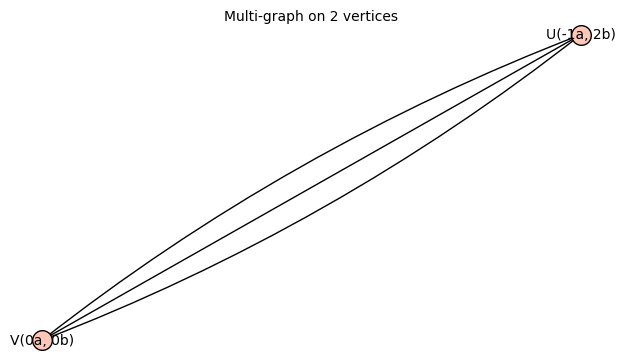

In [128]:
Graph(povezave_na_torusu(-1,1,0,1), multiedges = True)